In [11]:
import numpy as np
from matplotlib import pyplot as plt
import requests
from tqdm.auto import tqdm

In [12]:
def measure_time(url):
    """Get API response time."""
    r = requests.get(url)

    if r.status_code == 200:
        time = r.elapsed.total_seconds()
    else:
        time = -1
    return time

In [15]:
measure_time('https://tournesol.app/api/v2/videos/?limit=1')

0.155582

In [27]:
def measure_time_videos_n(n_videos=10):
    """Measure how long videos load."""
    url = f'http://127.0.0.1:8000/api/v2/videos/?limit={int(n_videos)}'
    return measure_time(url)

[1, 8, 15, 22, 29, 36, 43, 50, 57, 64, 71, 78, 85, 92, 100]

In [59]:
# list of number of videos to request
n_videos = np.array([int(t) for t in np.linspace(1, 100, 15)])

# how many repetitions to make
repeats = 20

# resulting map n_videos -> array by repeat
result = {n: [] for n in n_videos}

In [60]:
# reverse order to finish the long ones faster and get a sense of how long it would take overall
for n in tqdm(n_videos[::-1], desc="n_videos", leave=True):
    for rep in tqdm(range(repeats), desc="repeats", leave=False):
        res = measure_time_videos_n(n)
        result[n].append(res)

In [61]:
data = [result[n] for n in n_videos]
means = np.array([np.mean(d) for d in data])
stds =  np.array([np.std(d) for d in data])

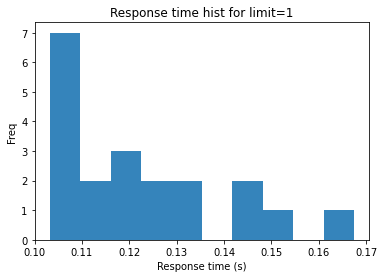

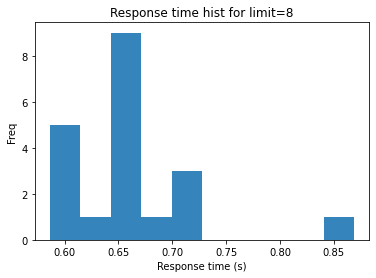

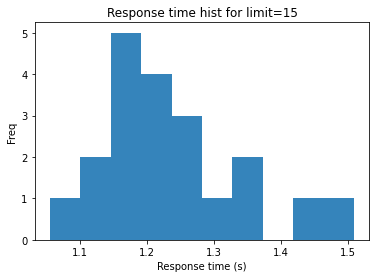

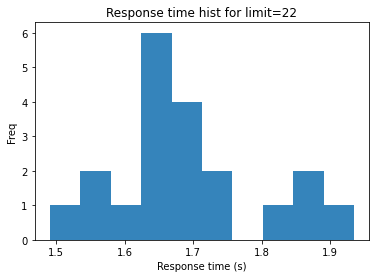

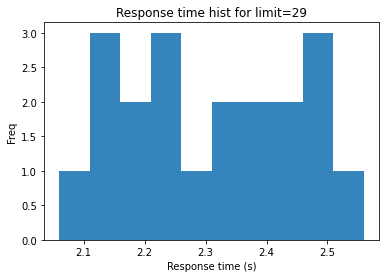

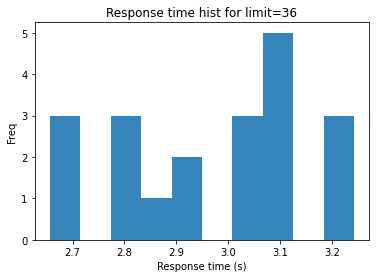

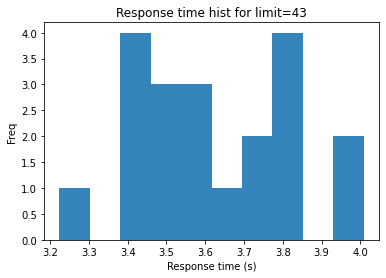

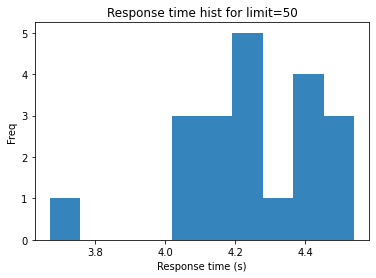

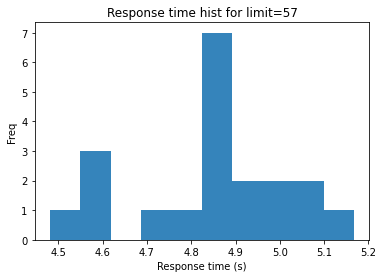

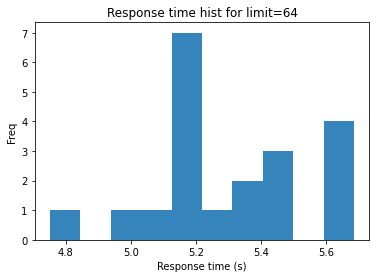

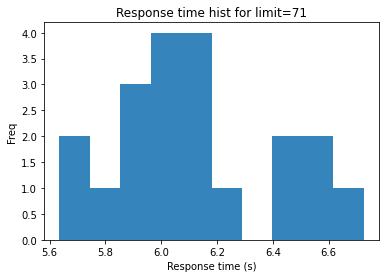

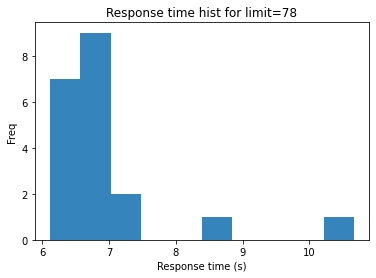

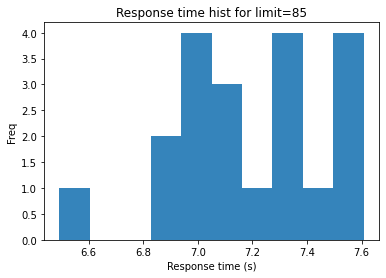

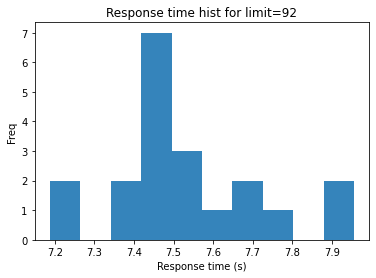

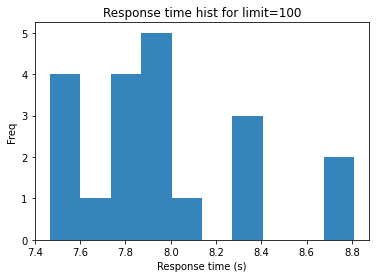

In [62]:
for n in n_videos:
    plt.title(f"Response time hist for limit={n}")
    plt.hist(result[n], alpha=0.9)
    plt.xlabel("Response time (s)")
    plt.ylabel("Freq")
    plt.show()

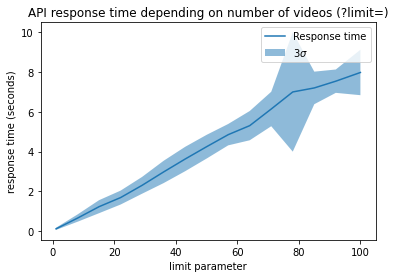

In [63]:
plt.title("API response time depending on number of videos (?limit=)")
plt.plot(n_videos, means, label="Response time")
plt.fill_between(n_videos, means - 3 * stds, means + 3 * stds, alpha=0.5, label="3$\sigma$")
plt.xlabel("limit parameter")
plt.ylabel("response time (seconds)")
plt.legend()
plt.show()